In [116]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import pickle as pk
warnings.filterwarnings('ignore')

---
Data OverView
--

In [117]:
df = pd.read_csv(r"D:\00jupters-notebook\data-csv\df_EDA.csv")
df.head()

,Unnamed: 0,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Airlines,OriginCityName,DestCityName,DepDelay,ArrDelay,AirTime,Distance,Month_Str,DayOfWeek_Str,Flight_Status
0,1,1,1,6,4,2022-01-06,Delta Airlines,"Atlanta, GA","Fort Lauderdale, FL",-4.0,-1.0,93.0,581.0,Jan,Thu,0
1,2,1,1,6,4,2022-01-06,Delta Airlines,"Fort Lauderdale, FL","Atlanta, GA",-2.0,-12.0,83.0,581.0,Jan,Thu,0
2,3,1,1,6,4,2022-01-06,Delta Airlines,"Fort Lauderdale, FL","Raleigh/Durham, NC",-5.0,-15.0,93.0,680.0,Jan,Thu,0
3,4,1,1,6,4,2022-01-06,Delta Airlines,"Atlanta, GA","Jackson/Vicksburg, MS",-4.0,-11.0,60.0,341.0,Jan,Thu,0
4,5,1,1,6,4,2022-01-06,Delta Airlines,"Jackson/Vicksburg, MS","Atlanta, GA",-7.0,-23.0,49.0,341.0,Jan,Thu,0


In [118]:
df.columns

Index(['Unnamed: 0', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek',
       'FlightDate', 'Airlines', 'OriginCityName', 'DestCityName', 'DepDelay',
       'ArrDelay', 'AirTime', 'Distance', 'Month_Str', 'DayOfWeek_Str',
       'Flight_Status'],
      dtype='object')

| العمود             | المعنى                                                                               |
| ------------------ | ------------------------------------------------------------------------------------ |
| **Unnamed: 0**     | رقم تسلسلي (Index) اتخزن مع الداتا بالغلط أثناء الحفظ، غالبًا ملوش لازمة في التحليل  |
| **Quarter**        | الربع السنوي (1 = يناير–مارس، 2 = أبريل–يونيو، 3 = يوليو–سبتمبر، 4 = أكتوبر–ديسمبر)  |
| **Month**          | رقم الشهر (1 = يناير، 12 = ديسمبر)                                                   |
| **DayofMonth**     | يوم في الشهر (من 1 إلى 31)                                                           |
| **DayOfWeek**      | رقم اليوم في الأسبوع (1 = غالبًا الإثنين أو الأحد حسب النظام المستخدم)               |
| **FlightDate**     | تاريخ الرحلة بالكامل (سنة-شهر-يوم)                                                   |
| **Airlines**       | شركة الطيران المشغلة للرحلة                                                          |
| **OriginCityName** | مدينة الإقلاع (المطار اللي الطيارة طلعت منه)                                         |
| **DestCityName**   | مدينة الوصول (المطار اللي الطيارة رايحة له)                                          |
| **DepDelay**       | مدة تأخير الإقلاع بالدقائق (لو بالسالب يبقى أقلعت بدري)                              |
| **ArrDelay**       | مدة تأخير الوصول بالدقائق (لو بالسالب يبقى وصلت بدري)                                |
| **AirTime**        | مدة الطيران الفعلية في الجو بالدقائق                                                 |
| **Distance**       | المسافة بين المدينتين (غالبًا بالميل)                                                |
| **Month_Str**      | اسم الشهر كنص (January, February… بدل الرقم)                                         |
| **DayOfWeek_Str**  | اسم اليوم كنص (Monday, Tuesday… بدل الرقم)                                           |
| **Flight_Status**  | حالة الرحلة (مثلاً: On Time, Delayed, Cancelled) — وده غالبًا التارجت لو هتعمل موديل |


In [119]:
df.shape

(6804006, 16)

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6804006 entries, 0 to 6804005
Data columns (total 16 columns):
 #   Column          Dtype  
---  ------          -----  
 0   Unnamed: 0      int64  
 1   Quarter         int64  
 2   Month           int64  
 3   DayofMonth      int64  
 4   DayOfWeek       int64  
 5   FlightDate      object 
 6   Airlines        object 
 7   OriginCityName  object 
 8   DestCityName    object 
 9   DepDelay        float64
 10  ArrDelay        float64
 11  AirTime         float64
 12  Distance        float64
 13  Month_Str       object 
 14  DayOfWeek_Str   object 
 15  Flight_Status   int64  
dtypes: float64(4), int64(6), object(6)
memory usage: 830.6+ MB


In [121]:
df.describe()

,Unnamed: 0,Quarter,Month,DayofMonth,DayOfWeek,DepDelay,ArrDelay,AirTime,Distance,Flight_Status
count,6.804006e+06,6.804006e+06,6.804006e+06,6.804006e+06,6.804006e+06,6.804006e+06,6.804006e+06,6.804006e+06,6.804006e+06,6.804006e+06
mean,3.517545e+06,2.523038e+00,6.567713e+00,1.573091e+01,3.976463e+00,1.241432e+01,6.970550e+00,1.106566e+02,7.980150e+02,2.026434e-01
std,2.014550e+06,1.103817e+00,3.389116e+00,8.756696e+00,2.003374e+00,5.279832e+01,5.480503e+01,6.983069e+01,5.935453e+02,4.019690e-01
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-9.600000e+01,-1.000000e+02,8.000000e+00,3.100000e+01,0.000000e+00
25%,1.775550e+06,2.000000e+00,4.000000e+00,8.000000e+00,2.000000e+00,-5.000000e+00,-1.400000e+01,6.000000e+01,3.680000e+02,0.000000e+00
50%,3.524602e+06,3.000000e+00,7.000000e+00,1.600000e+01,4.000000e+00,-2.000000e+00,-5.000000e+00,9.300000e+01,6.410000e+02,0.000000e+00
75%,5.265804e+06,3.000000e+00,9.000000e+00,2.300000e+01,6.000000e+00,1.000000e+01,1.000000e+01,1.400000e+02,1.034000e+03,0.000000e+00
max,7.013507e+06,4.000000e+00,1.200000e+01,3.100000e+01,7.000000e+00,7.223000e+03,7.232000e+03,7.270000e+02,5.095000e+03,1.000000e+00


-----
Data Cleaning
----

----
* Check Null Values


In [122]:
df.isna().sum().sort_values(ascending=False)

Unnamed: 0        0
Quarter           0
Month             0
DayofMonth        0
DayOfWeek         0
FlightDate        0
Airlines          0
OriginCityName    0
DestCityName      0
DepDelay          0
ArrDelay          0
AirTime           0
Distance          0
Month_Str         0
DayOfWeek_Str     0
Flight_Status     0
dtype: int64

------
* Drop unimporant Features


In [123]:
df.columns

Index(['Unnamed: 0', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek',
       'FlightDate', 'Airlines', 'OriginCityName', 'DestCityName', 'DepDelay',
       'ArrDelay', 'AirTime', 'Distance', 'Month_Str', 'DayOfWeek_Str',
       'Flight_Status'],
      dtype='object')

In [124]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)
df.reset_index(drop=True,inplace=True)

In [125]:
df.drop(['Month_Str','DayOfWeek_Str'],axis=1,inplace=True)
df.reset_index(drop=True,inplace=True)

-----
* Drop data lead to Data leakage

In [126]:
df.drop(['ArrDelay','AirTime'],axis=1 ,inplace=True)
df.reset_index(drop=True,inplace=True)

-----
* Extract strong Feature and drop weakness

In [127]:
df['FlightDate'] = pd.to_datetime(df['FlightDate'])

In [128]:
df['Year'] = df['FlightDate'].dt.year
df['Weakend'] = df['FlightDate'].dt.dayofweek

In [129]:
df['Year'].head()

0    2022
1    2022
2    2022
3    2022
4    2022
Name: Year, dtype: int32

In [130]:
df['Weakend'].unique()

array([3, 4, 5, 6, 0, 1, 2], dtype=int32)

In [131]:
df.drop(['FlightDate'],axis=1,inplace=True)
df.reset_index(drop=True,inplace=True)

----
* Check Duplicated


In [132]:
df.duplicated().sum()

np.int64(444718)

In [133]:
df.drop_duplicates(inplace=True)

In [134]:
df.duplicated().sum()

np.int64(0)

In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6359288 entries, 0 to 6804005
Data columns (total 12 columns):
 #   Column          Dtype  
---  ------          -----  
 0   Quarter         int64  
 1   Month           int64  
 2   DayofMonth      int64  
 3   DayOfWeek       int64  
 4   Airlines        object 
 5   OriginCityName  object 
 6   DestCityName    object 
 7   DepDelay        float64
 8   Distance        float64
 9   Flight_Status   int64  
 10  Year            int32  
 11  Weakend         int32  
dtypes: float64(2), int32(2), int64(5), object(3)
memory usage: 582.2+ MB


------
Data Encoding
---

------
* Show Categry in Data

In [136]:
for col in df.select_dtypes(include='object'):
    print(col,df[col].nunique())

Airlines 10
OriginCityName 369
DestCityName 370


----
* OneHot ---> Airlines


In [137]:
from sklearn.preprocessing import OneHotEncoder
one = OneHotEncoder(handle_unknown='ignore')
one_en = one.fit_transform(df[['Airlines']]).toarray()

In [138]:
one_df = pd.DataFrame(one_en,columns=one.get_feature_names_out(['Airlines']),index=df.index)
df = pd.concat([df,one_df],axis=1)

In [139]:
pk.dump(one,open('OneHot.pkl','wb'))

In [140]:
df.drop(['Airlines'],axis=1,inplace=True)

-------
* Targe for ---> ( DestCityName  , OriginCityName )

In [141]:
from category_encoders import TargetEncoder
tar = TargetEncoder()
tarpickle = {}
for col in ['DestCityName','OriginCityName']:
    df[col] = tar.fit_transform(df[[col]],df['Flight_Status'])
    tarpickle[col] = tar

pk.dump(tarpickle,open('Target.pkl','wb'))

In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6359288 entries, 0 to 6804005
Data columns (total 21 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   Quarter                      int64  
 1   Month                        int64  
 2   DayofMonth                   int64  
 3   DayOfWeek                    int64  
 4   OriginCityName               float64
 5   DestCityName                 float64
 6   DepDelay                     float64
 7   Distance                     float64
 8   Flight_Status                int64  
 9   Year                         int32  
 10  Weakend                      int32  
 11  Airlines_Alaska Airlines     float64
 12  Airlines_Allegiant Air       float64
 13  Airlines_American Airlines   float64
 14  Airlines_Delta Airlines      float64
 15  Airlines_Frontier Airlines   float64
 16  Airlines_Hawaiian Airlines   float64
 17  Airlines_JetBlue Airways     float64
 18  Airlines_Southwest Airlines  float64
 19  Airli

In [143]:
df.columns

Index(['Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'OriginCityName',
       'DestCityName', 'DepDelay', 'Distance', 'Flight_Status', 'Year',
       'Weakend', 'Airlines_Alaska Airlines', 'Airlines_Allegiant Air',
       'Airlines_American Airlines', 'Airlines_Delta Airlines',
       'Airlines_Frontier Airlines', 'Airlines_Hawaiian Airlines',
       'Airlines_JetBlue Airways', 'Airlines_Southwest Airlines',
       'Airlines_Spirit Airlines', 'Airlines_United Airlines'],
      dtype='object')

-----
Data Visiolization
---

---
* Check Unbalanced in Data

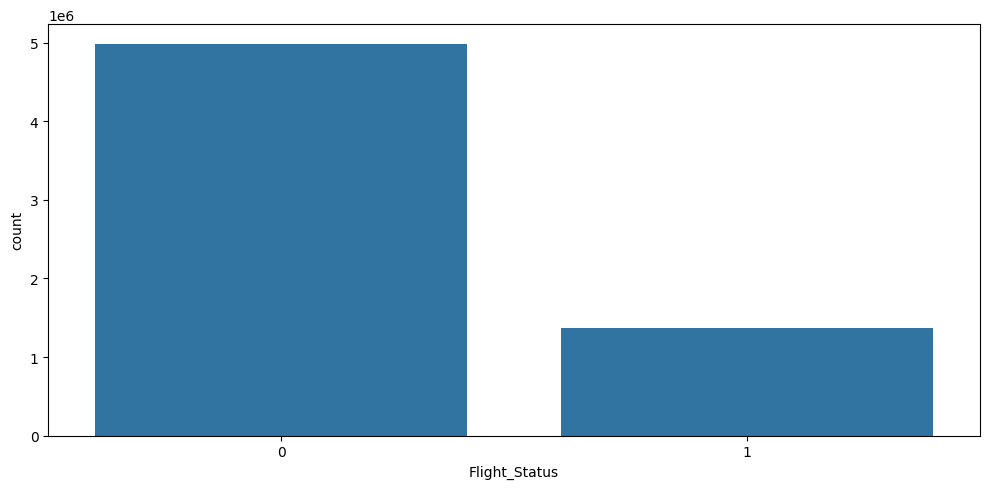

In [28]:
plt.figure(figsize=(10,5))
sns.countplot(x='Flight_Status',data=df)
plt.tight_layout()
plt.show()

----
* Relation Between Month & Flight_Status

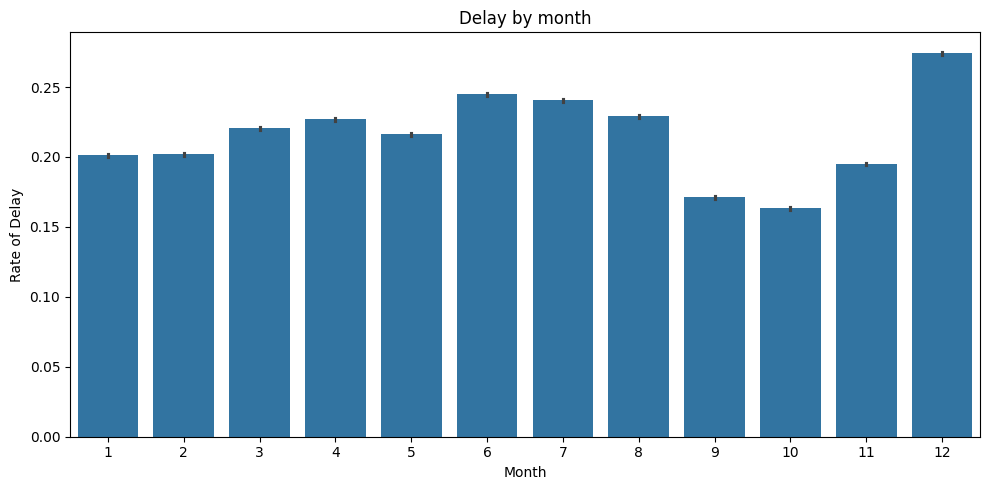

In [30]:
plt.figure(figsize=(10,5))
sns.barplot(x='Month' , y='Flight_Status',data=df , estimator='mean')
plt.title('Delay by month')
plt.ylabel('Rate of Delay')
plt.tight_layout()
plt.show()

----
* Relation Between Dayofweek & Flight_Status

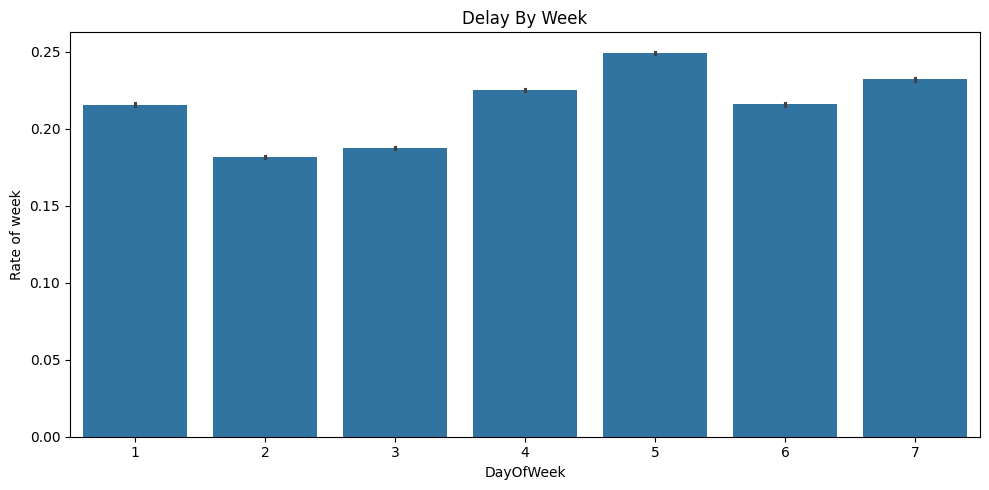

In [32]:
plt.figure(figsize=(10,5))
sns.barplot(x= 'DayOfWeek' , y='Flight_Status',data=df,estimator='mean')
plt.title('Delay By Week')
plt.ylabel('Rate of week')
plt.tight_layout()
plt.show()

----
* most Delay city


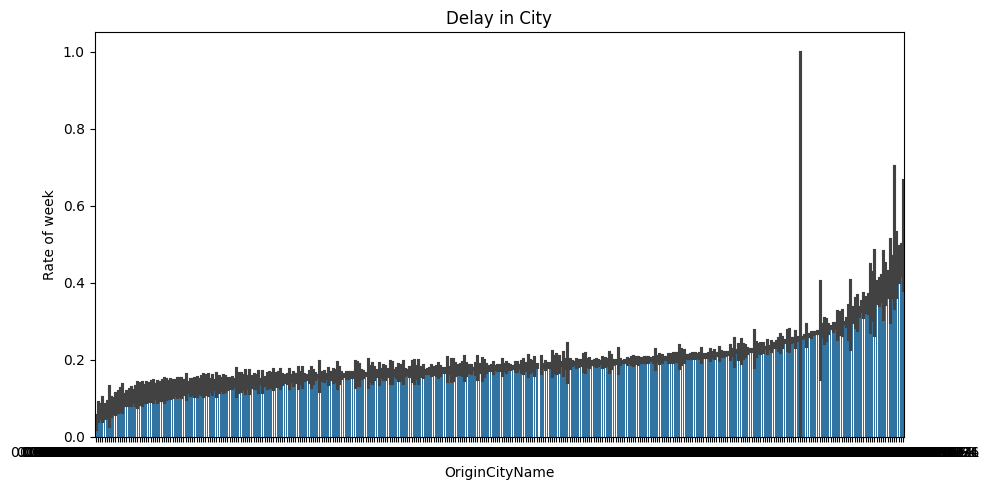

In [33]:
plt.figure(figsize=(10,5))
sns.barplot(x= 'OriginCityName' , y='Flight_Status',data=df)
plt.title('Delay in City')
plt.ylabel('Rate of week')
plt.tight_layout()
plt.show()

In [34]:
df.columns

Index(['Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'OriginCityName',
       'DestCityName', 'DepDelay', 'Distance', 'Flight_Status', 'Year',
       'Weakend', 'Airlines_Alaska Airlines', 'Airlines_Allegiant Air',
       'Airlines_American Airlines', 'Airlines_Delta Airlines',
       'Airlines_Frontier Airlines', 'Airlines_Hawaiian Airlines',
       'Airlines_JetBlue Airways', 'Airlines_Southwest Airlines',
       'Airlines_Spirit Airlines', 'Airlines_United Airlines'],
      dtype='object')

In [35]:
air_cols = [col for col in df.columns if 'Airlines_' in col]

for col in air_cols:
    print(col, df[df[col]==1]['Flight_Status'].mean())


Airlines_Alaska Airlines 0.1934914981617647
Airlines_Allegiant Air 0.3312119485883149
Airlines_American Airlines 0.21191071705248646
Airlines_Delta Airlines 0.16989519517999088
Airlines_Frontier Airlines 0.311564571306393
Airlines_Hawaiian Airlines 0.24790345673961955
Airlines_JetBlue Airways 0.3295961096852627
Airlines_Southwest Airlines 0.2442807940384495
Airlines_Spirit Airlines 0.2429790549354979
Airlines_United Airlines 0.1936872247538541


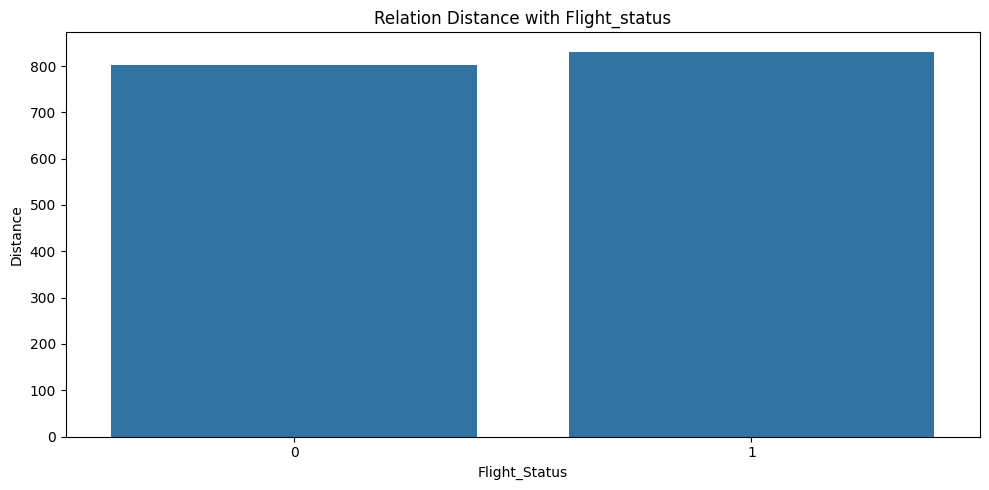

In [36]:
plt.figure(figsize=(10,5))
sns.barplot(x='Flight_Status', y='Distance', data=df)
plt.title('Relation Distance with Flight_status')
plt.tight_layout()
plt.show()

------
* Correlation

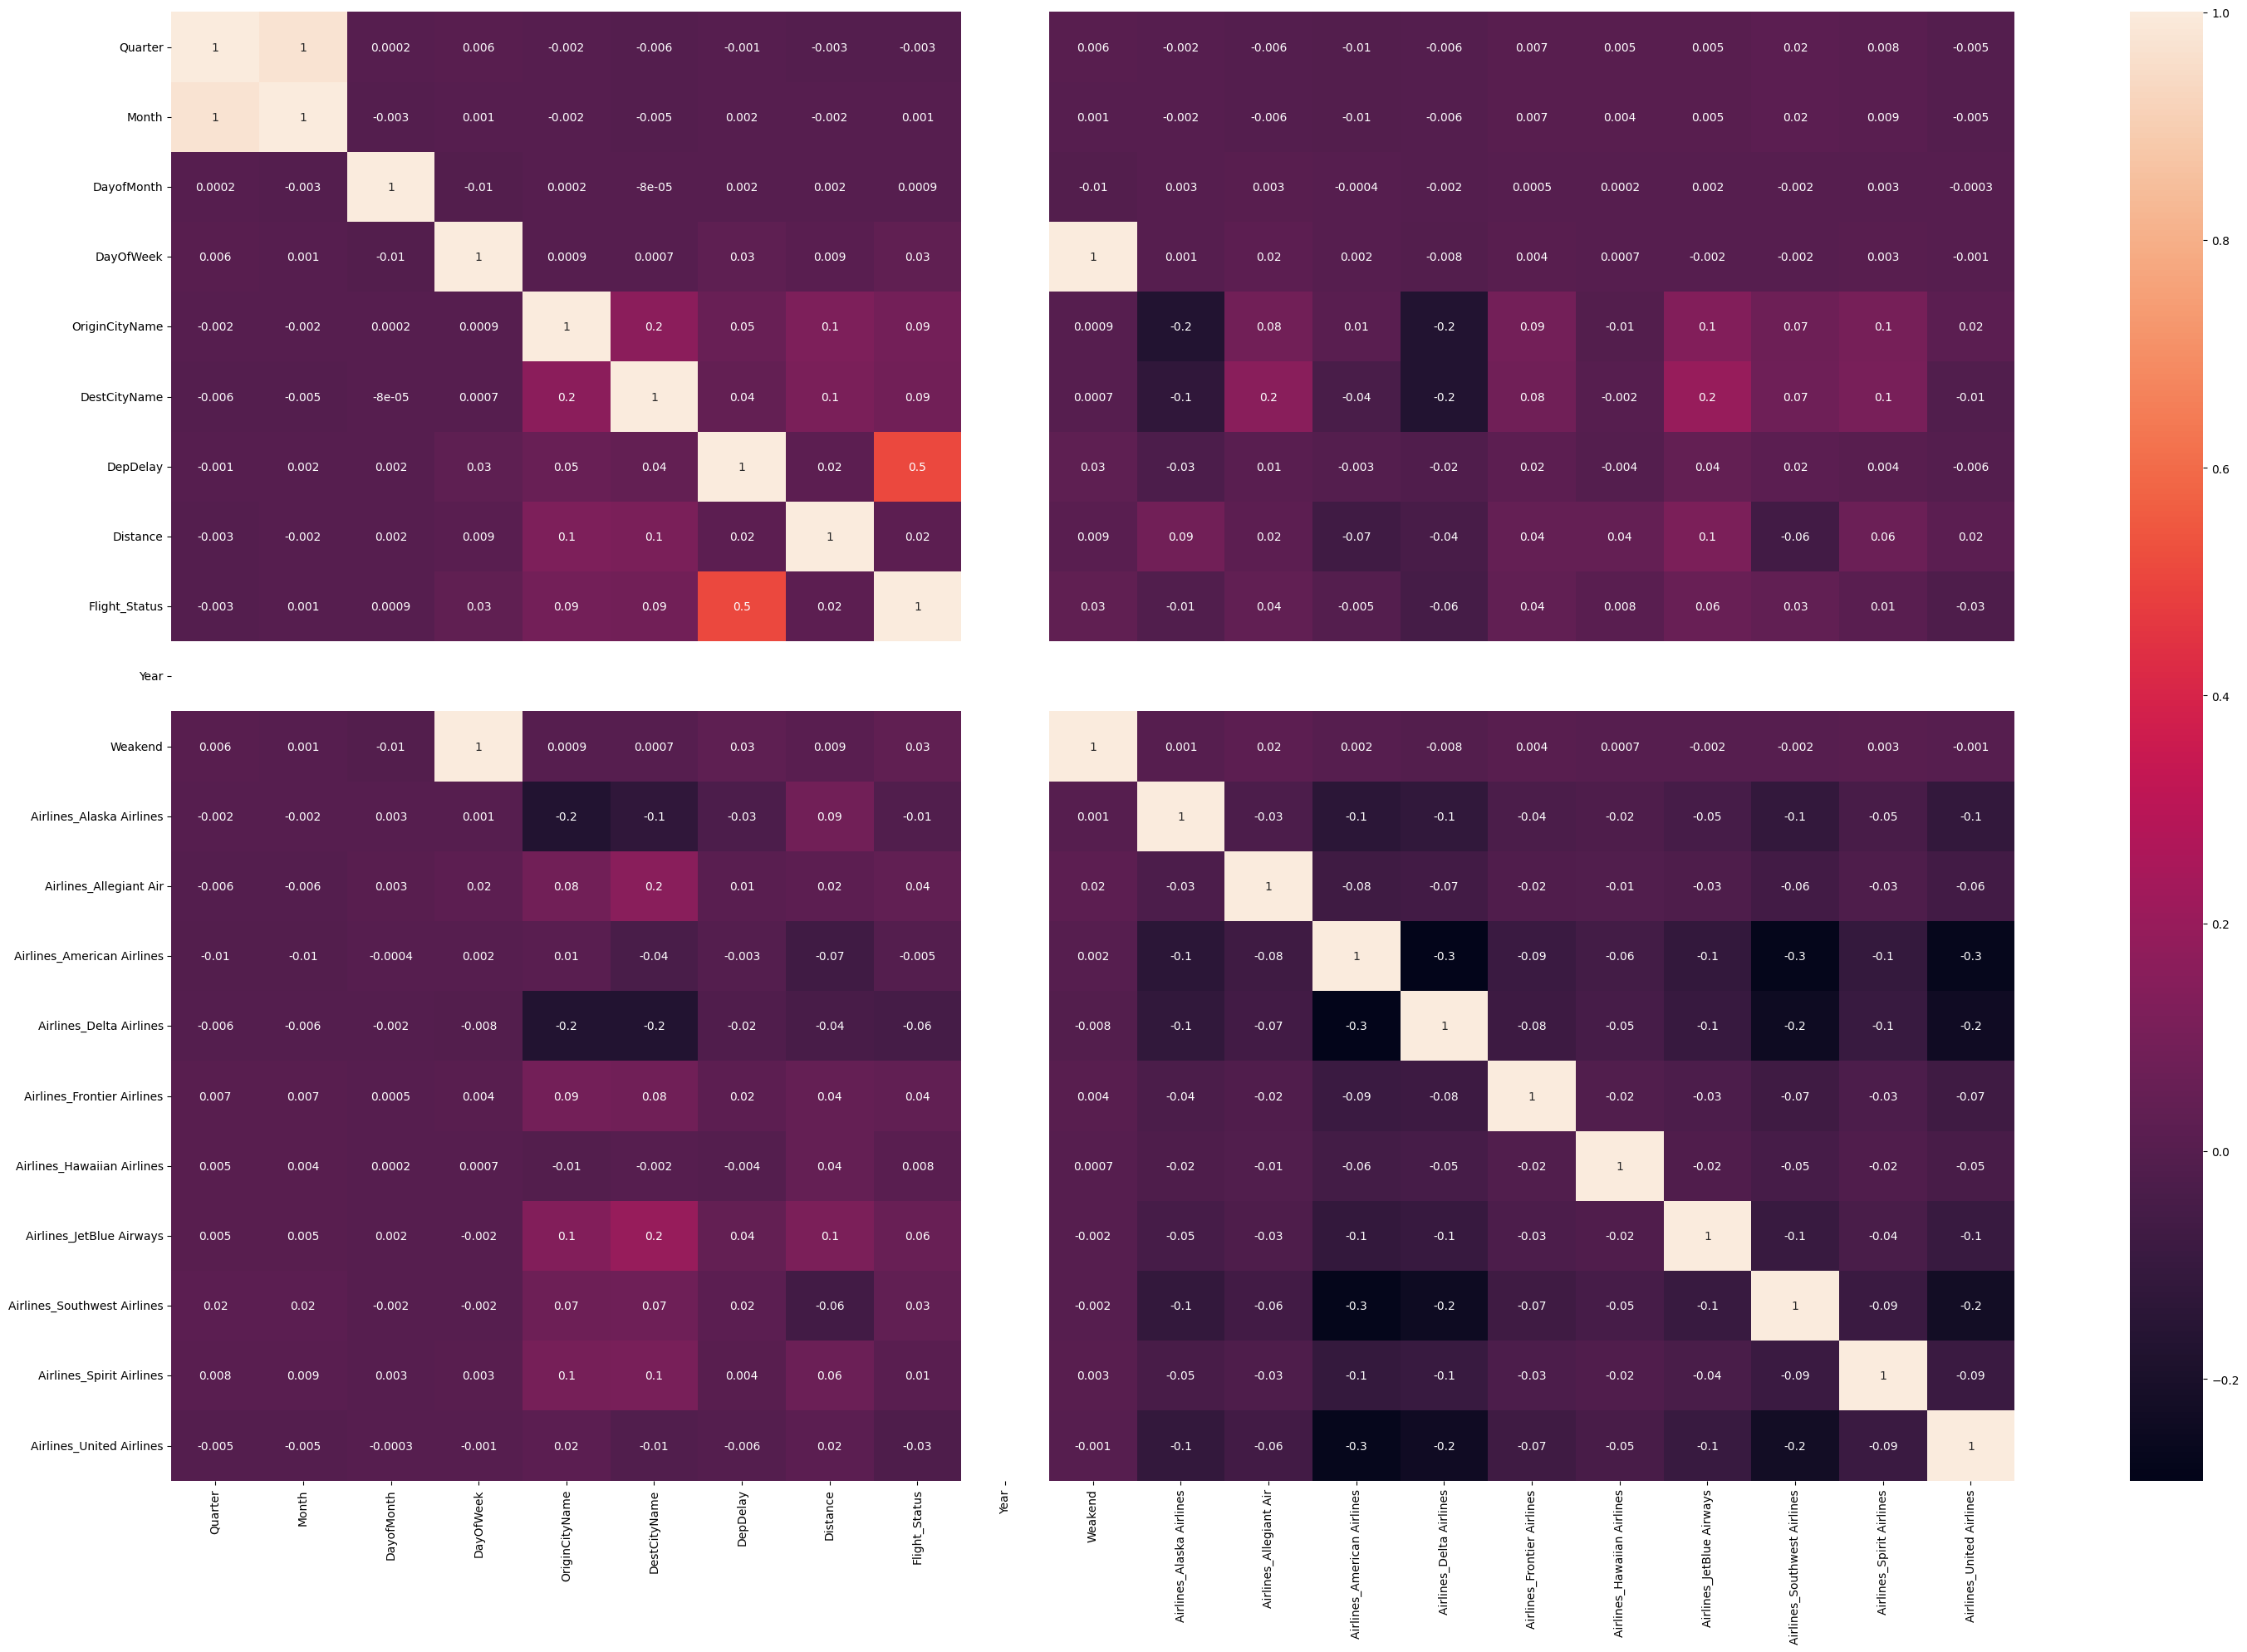

In [37]:
plt.figure(figsize=(30,20))
sns.heatmap(df.corr(),annot=True,fmt='0.1g')
plt.tight_layout()
plt.show()

----------
* Relation between Distance and Delay Probability

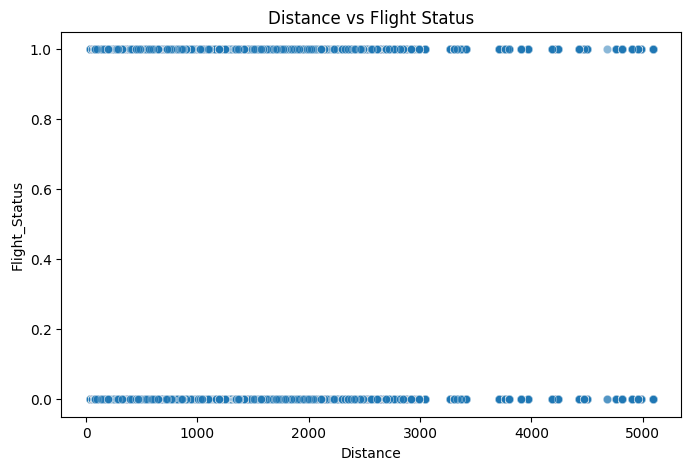

In [38]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Distance', y='Flight_Status', data=df, alpha=0.3)
plt.title('Distance vs Flight Status')
plt.show()


------
📈 Line Plot
Monthly Delay Trend
ليه؟

نشوف الاتجاه العام خلال السنة.
تستنتج إيه؟

في شهور قمة ضغط؟

هل التأخير بيزيد تدريجيًا؟

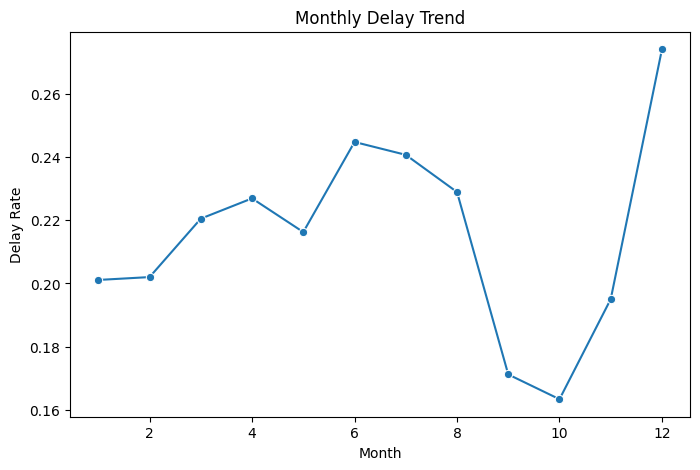

In [39]:
monthly_delay = df.groupby('Month')['Flight_Status'].mean().reset_index()

plt.figure(figsize=(8,5))
sns.lineplot(x='Month', y='Flight_Status', data=monthly_delay, marker='o')
plt.title('Monthly Delay Trend')
plt.ylabel('Delay Rate')
plt.show()


----------
📦 Box Plot
Distance Distribution by Flight Status
ليه؟

نقارن توزيع المسافات بين الرحلات المتأخرة وغير المتأخرة.
    
تستنتج إيه؟
لو Median أعلى في فئة التأخير → الرحلات الطويلة تتأخر أكتر

لو التوزيع شبه بعض → المسافة مش عامل قوي



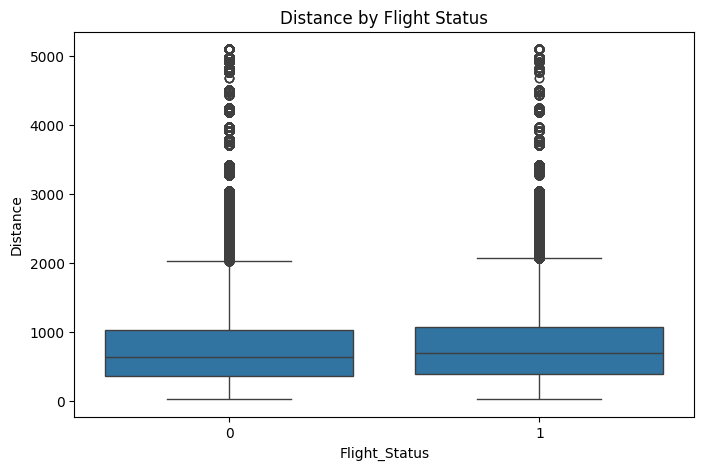

In [40]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Flight_Status', y='Distance', data=df)
plt.title('Distance by Flight Status')
plt.show()


----------
Distribution of Distance
ليه؟

نعرف شكل توزيع المسافات وهل فيها Outliers.
تستنتج إيه؟

التوزيع طبيعي ولا Skewed؟

هل محتاج Scaling أو Clipping؟

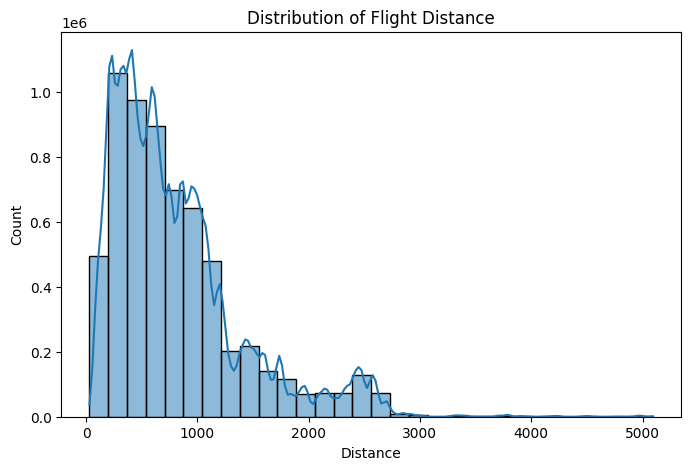

In [41]:
plt.figure(figsize=(8,5))
sns.histplot(df['Distance'], bins=30, kde=True)
plt.title('Distribution of Flight Distance')
plt.show()


-------
Data spliting
--

In [144]:
x = df.drop(['Flight_Status'],axis=1)
y = df['Flight_Status']

In [145]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train, y_test = train_test_split(x,y,train_size=0.2,stratify=y ,random_state=42)


In [146]:
x_train.shape , x_test.shape , y_train.shape, y_test.shape

((1271857, 20), (5087431, 20), (1271857,), (5087431,))

In [147]:
x_train.head()

,Quarter,Month,DayofMonth,DayOfWeek,OriginCityName,DestCityName,DepDelay,Distance,Year,Weakend,Airlines_Alaska Airlines,Airlines_Allegiant Air,Airlines_American Airlines,Airlines_Delta Airlines,Airlines_Frontier Airlines,Airlines_Hawaiian Airlines,Airlines_JetBlue Airways,Airlines_Southwest Airlines,Airlines_Spirit Airlines,Airlines_United Airlines
753356,1,2,3,4,0.233667,0.189280,27.0,1597.0,2022,3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
945088,1,2,10,4,0.199137,0.258965,-5.0,479.0,2022,3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4293170,3,8,15,1,0.160581,0.158211,-7.0,462.0,2022,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5115393,4,10,14,5,0.201528,0.220547,13.0,1190.0,2022,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5703719,4,11,1,2,0.196580,0.169974,-5.0,453.0,2022,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


-----
Data Scailling
--

In [148]:
for col in x_train:
    print(col,x_train[col].max())

Quarter 4
Month 12
DayofMonth 31
DayOfWeek 7
OriginCityName 0.4930823746154331
DestCityName 0.4480921278789962
DepDelay 5995.0
Distance 5095.0
Year 2022
Weakend 6
Airlines_Alaska Airlines 1.0
Airlines_Allegiant Air 1.0
Airlines_American Airlines 1.0
Airlines_Delta Airlines 1.0
Airlines_Frontier Airlines 1.0
Airlines_Hawaiian Airlines 1.0
Airlines_JetBlue Airways 1.0
Airlines_Southwest Airlines 1.0
Airlines_Spirit Airlines 1.0
Airlines_United Airlines 1.0


In [149]:
col_scailing = ['Quarter','Month','DayofMonth','DayOfWeek','Distance','Year','Weakend','DepDelay']

In [ ]:
plt.figure(figsize=(30,20))
i=1 
for col in col_scailing:
    if i==9:
        break
    else:
        plt.subplot(4,2,i)
        sns.histplot(x_train[col])
    i+=1

plt.tight_layout()
plt.show()

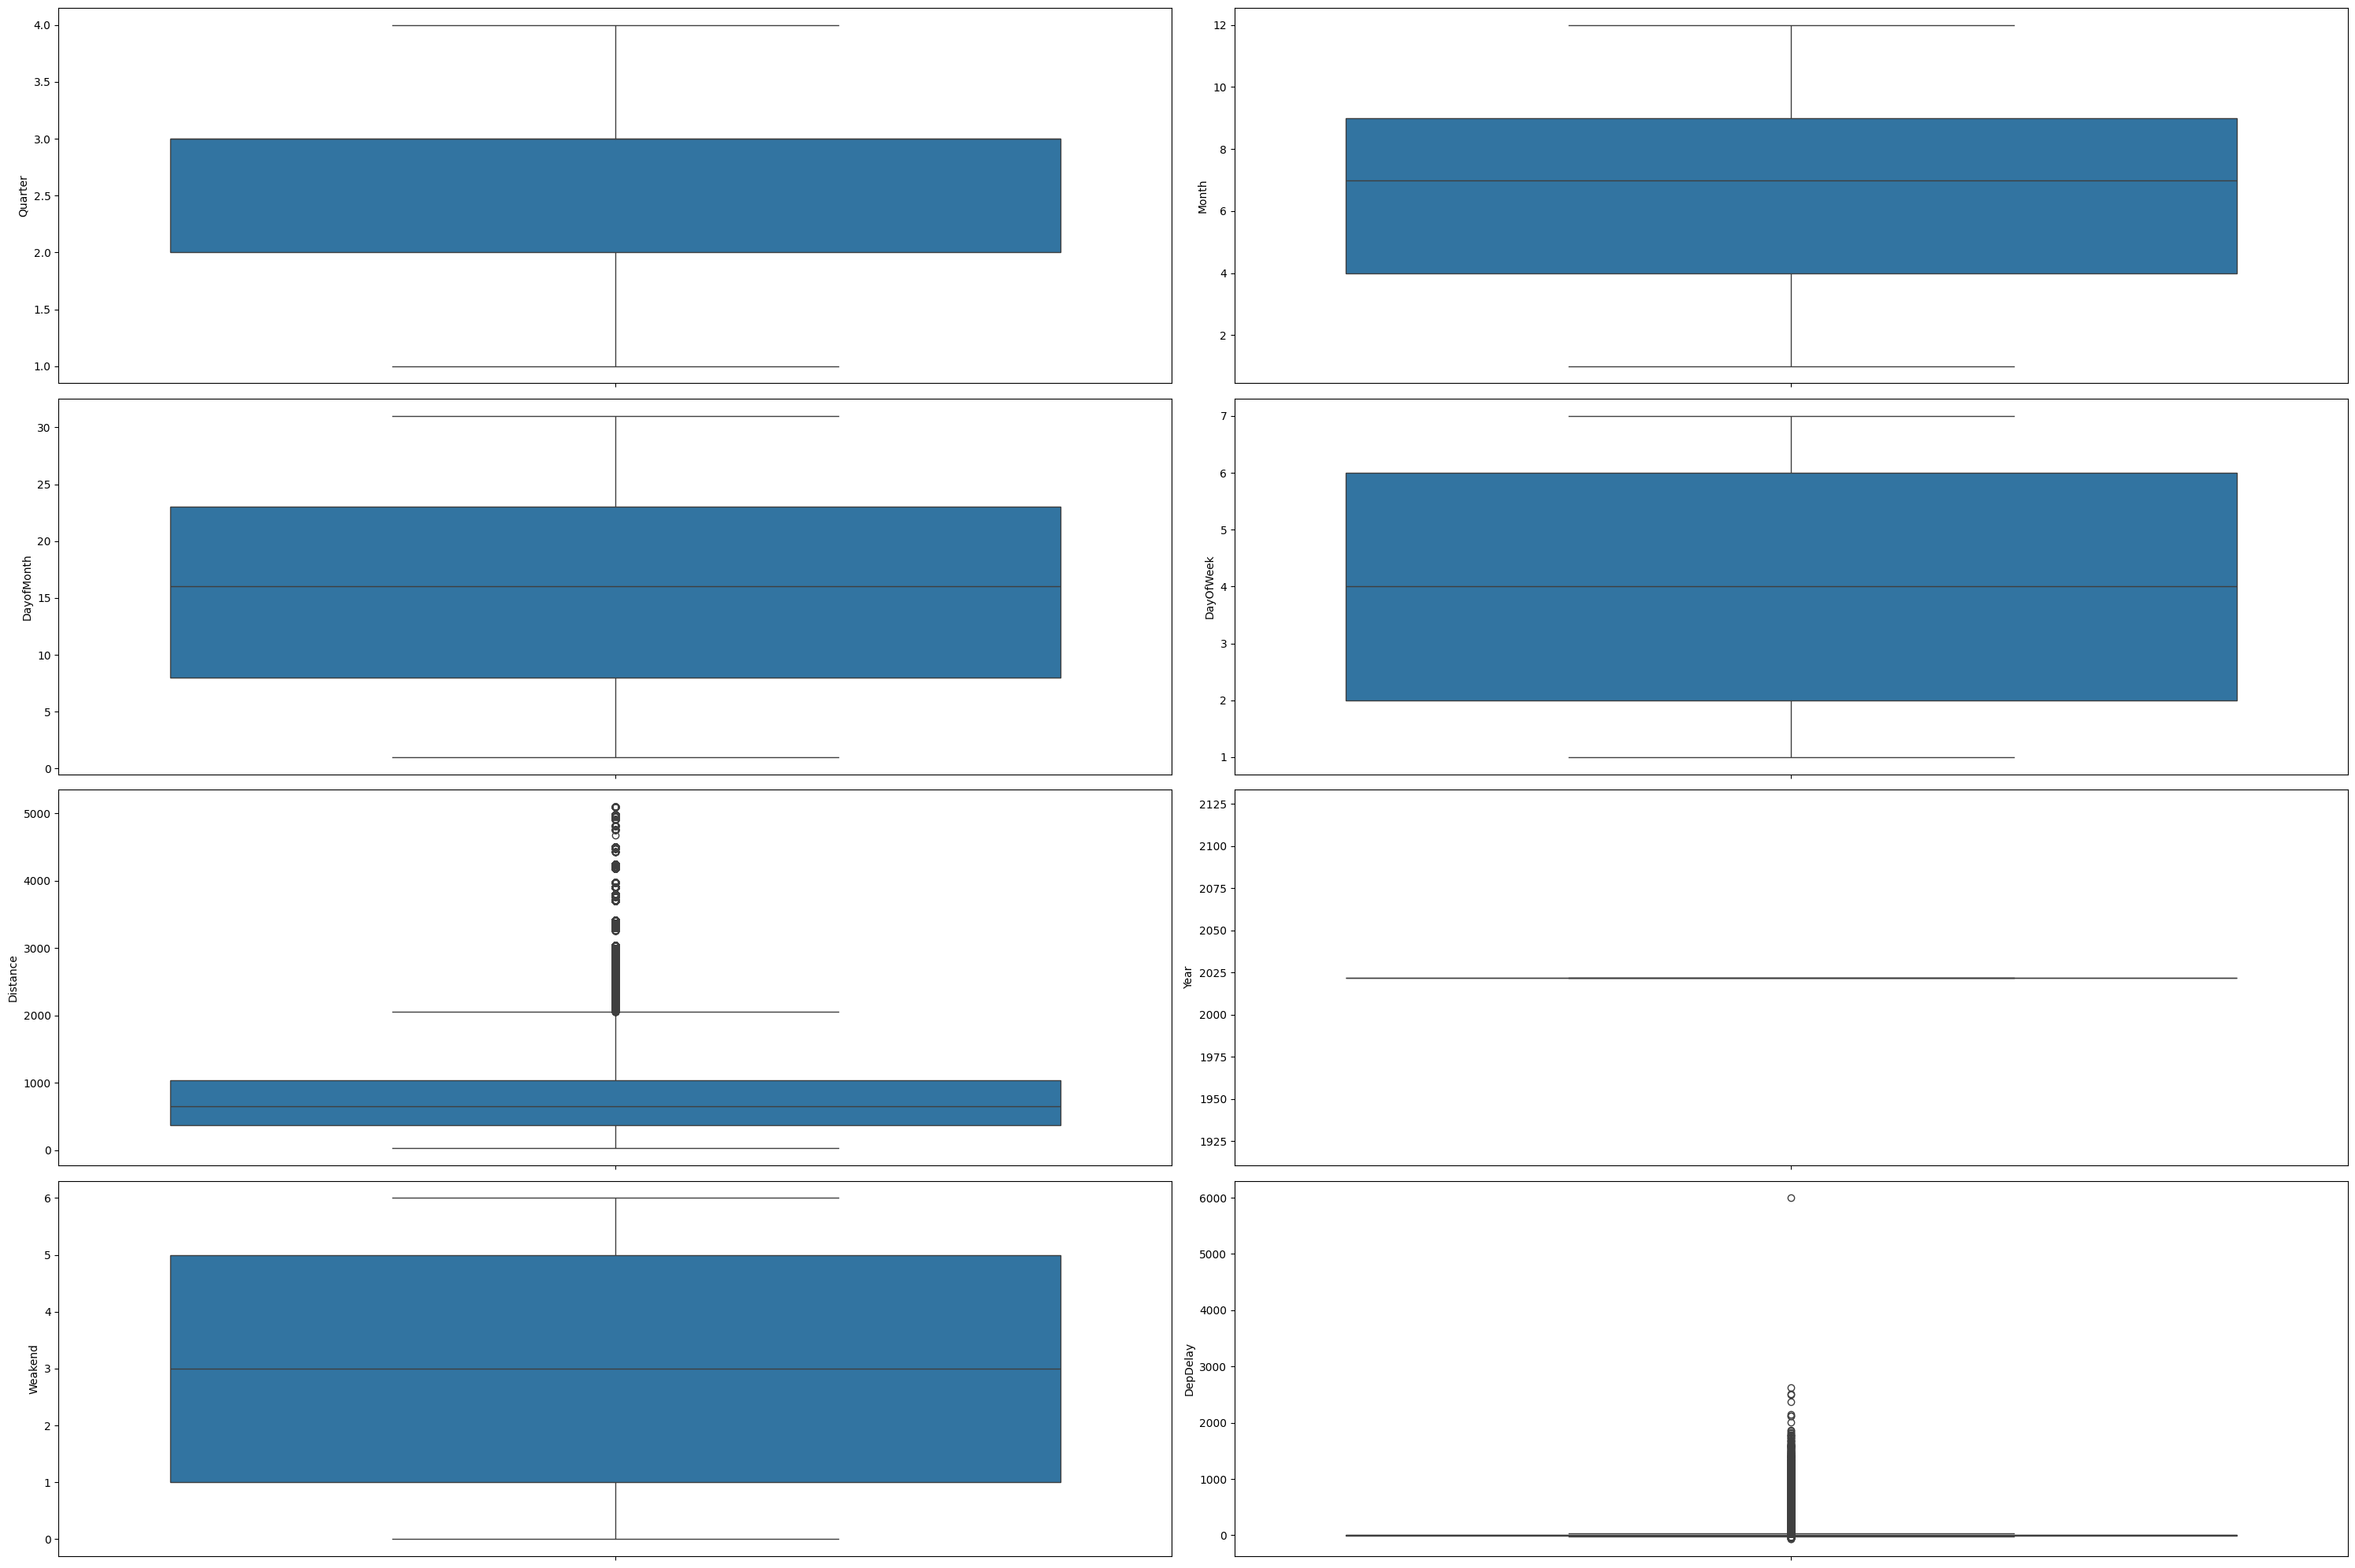

In [48]:
plt.figure(figsize=(30,20))
i=1 
for col in col_scailing:
    if i==9:
        break
    else:
        plt.subplot(4,2,i)
        sns.boxplot(x_train[col])
    i+=1

plt.tight_layout()
plt.show()

In [150]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler_pk = {}
for col in col_scailing:
    if col in ['Distance','DepDelay']:
        continue
    else:
        x_train[col] = scaler.fit_transform(x_train[[col]])
        x_test[col] = scaler.transform(x_test[[col]])
        scaler_pk[col] = scaler


pk.dump(scaler_pk,open('Stander.pkl','wb'))

In [151]:
from sklearn.preprocessing import RobustScaler
scaler2 = RobustScaler()
scaler2_pk = {}
for col in ['Distance','DepDelay']:
    x_train[col] = scaler2.fit_transform(x_train[[col]])
    x_test[col] = scaler2.transform(x_test[[col]])
    scaler2_pk[col] = scaler2

pk.dump(scaler2_pk,open('Robus.pkl','wb'))

In [152]:
x_train.head()

,Quarter,Month,DayofMonth,DayOfWeek,OriginCityName,DestCityName,DepDelay,Distance,Year,Weakend,Airlines_Alaska Airlines,Airlines_Allegiant Air,Airlines_American Airlines,Airlines_Delta Airlines,Airlines_Frontier Airlines,Airlines_Hawaiian Airlines,Airlines_JetBlue Airways,Airlines_Southwest Airlines,Airlines_Spirit Airlines,Airlines_United Airlines
753356,-1.379652,-1.346721,-1.453244,0.007337,0.233667,0.189280,1.750,1.407132,0.0,0.007337,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
945088,-1.379652,-1.346721,-0.653695,0.007337,0.199137,0.258965,-0.250,-0.254086,0.0,0.007337,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4293170,0.433383,0.423431,-0.082588,-1.489037,0.160581,0.158211,-0.375,-0.279346,0.0,-1.489037,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5115393,1.339901,1.013482,-0.196809,0.506128,0.201528,0.220547,0.875,0.802377,0.0,0.506128,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5703719,1.339901,1.308507,-1.681687,-0.990246,0.196580,0.169974,-0.250,-0.292719,0.0,-0.990246,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


----
Smote
---

In [153]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(sampling_strategy='auto', random_state=48)

x_train_under, y_train_under = rus.fit_resample(x_train, y_train)

print("Before:", y_train.value_counts())
print("After:", y_train_under.value_counts())

Before: Flight_Status
0    997429
1    274428
Name: count, dtype: int64
After: Flight_Status
0    274428
1    274428
Name: count, dtype: int64


-----
MOdeling
---

In [154]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report,
    balanced_accuracy_score,
    roc_auc_score,roc_curve,
    precision_recall_curve,average_precision_score
)
# Classification models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.naive_bayes import GaussianNB

from sklearn.ensemble import (
    RandomForestClassifier,
    ExtraTreesClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
    HistGradientBoostingClassifier,
    VotingClassifier,
    StackingClassifier
)

from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier


In [155]:
models = {

    # Linear
    "Logistic Regression": LogisticRegression(max_iter=2000, random_state=1),

    # Distance-based
    # "KNN": KNeighborsClassifier(n_neighbors=5),

    # SVM
    # "SVC": SVC(probability=True, random_state=1),

    # Tree
    "Decision Tree": DecisionTreeClassifier(random_state=1),

    # Naive Bayes
    "Naive Bayes": GaussianNB(),

    # Bagging Based
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=1),
    "Extra Trees": ExtraTreesClassifier(n_estimators=100, random_state=1),

    # Boosting
    "AdaBoost": AdaBoostClassifier(random_state=1),
    "Gradient Boosting": GradientBoostingClassifier(random_state=1),
    "Hist Gradient Boosting": HistGradientBoostingClassifier(random_state=1),

    # External Boosting Libraries
    "XGBoost": XGBClassifier(eval_metric='logloss', random_state=1, use_label_encoder=False),
    "CatBoost": CatBoostClassifier(verbose=0, random_state=1),
    "LightGBM": LGBMClassifier(random_state=1)
}

  0%|                                                                                           | 0/11 [00:00<?, ?it/s]


Confusion Matrix:
 [[3673745  315974]
 [ 184729  912983]]


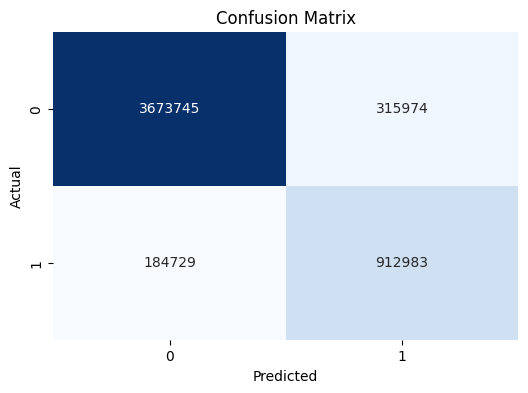


Classification Report:

              precision    recall  f1-score   support

           0       0.95      0.92      0.94   3989719
           1       0.74      0.83      0.78   1097712

    accuracy                           0.90   5087431
   macro avg       0.85      0.88      0.86   5087431
weighted avg       0.91      0.90      0.90   5087431

ROC-AUC: 0.9328341075600337


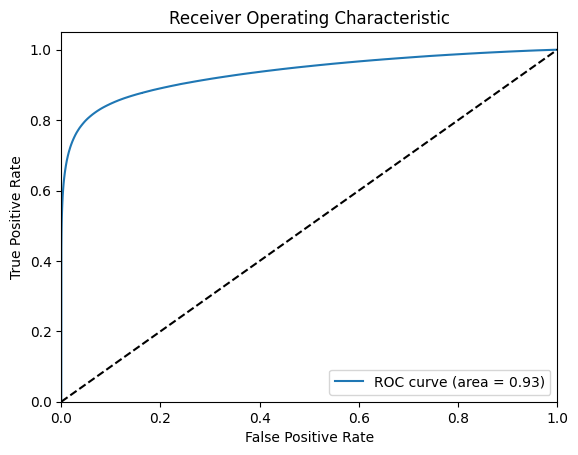

PR AUC: 0.8869340557282341


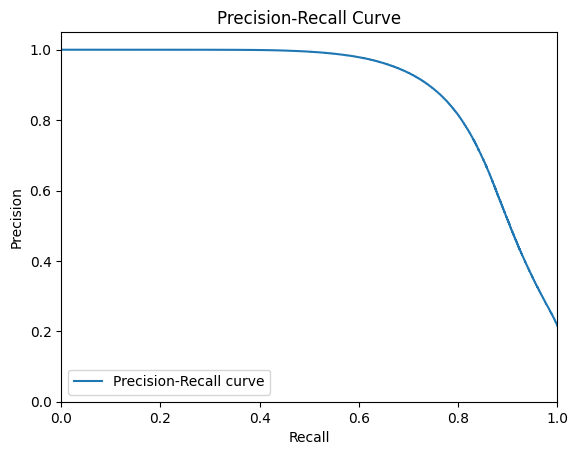

  9%|███████▌                                                                           | 1/11 [00:19<03:19, 19.93s/it]


Confusion Matrix:
 [[3210881  778838]
 [ 197396  900316]]


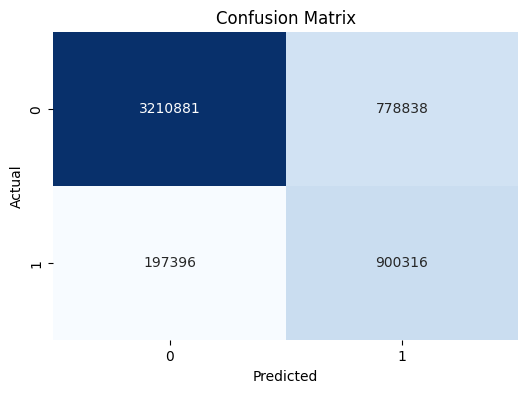


Classification Report:

              precision    recall  f1-score   support

           0       0.94      0.80      0.87   3989719
           1       0.54      0.82      0.65   1097712

    accuracy                           0.81   5087431
   macro avg       0.74      0.81      0.76   5087431
weighted avg       0.85      0.81      0.82   5087431

ROC-AUC: 0.8125007920518454


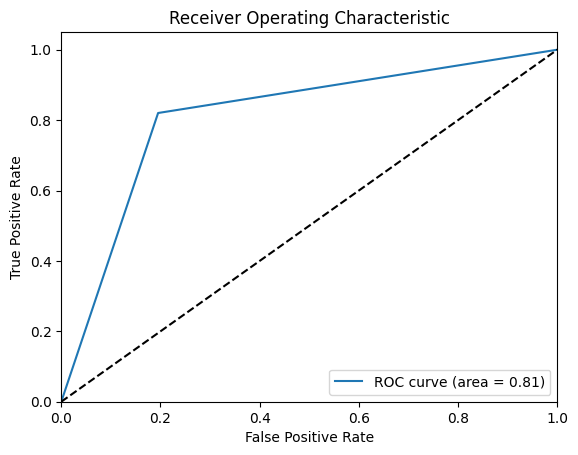

PR AUC: 0.4786324556296147


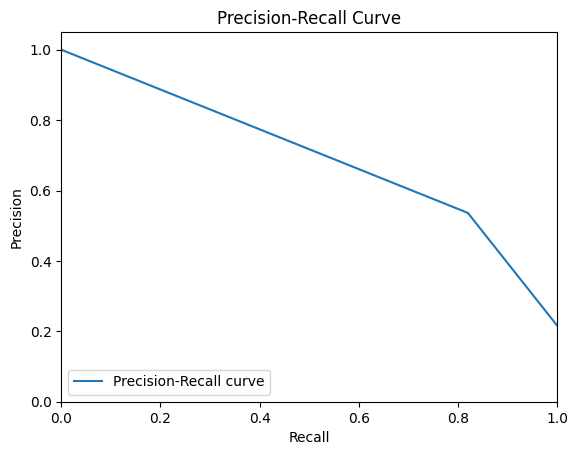

 18%|███████████████                                                                    | 2/11 [00:36<02:39, 17.70s/it]


Confusion Matrix:
 [[3552668  437051]
 [ 232590  865122]]


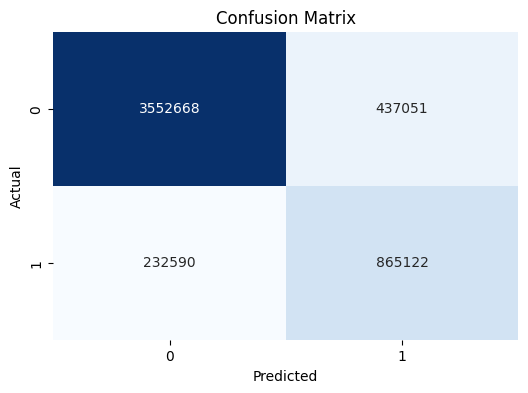


Classification Report:

              precision    recall  f1-score   support

           0       0.94      0.89      0.91   3989719
           1       0.66      0.79      0.72   1097712

    accuracy                           0.87   5087431
   macro avg       0.80      0.84      0.82   5087431
weighted avg       0.88      0.87      0.87   5087431

ROC-AUC: 0.8941567514975408


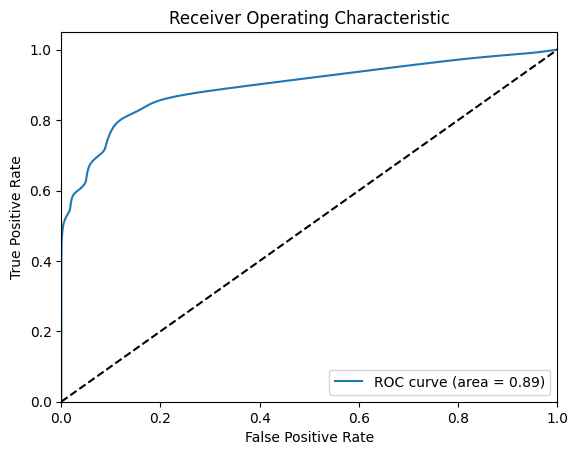

PR AUC: 0.8176225533774065


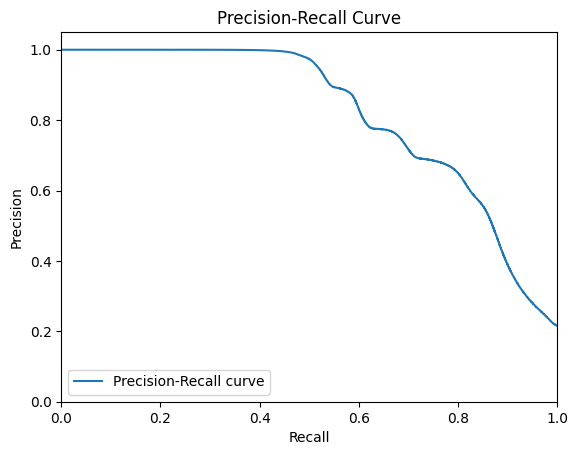

 27%|██████████████████████▋                                                            | 3/11 [00:55<02:26, 18.32s/it]


Confusion Matrix:
 [[3691579  298140]
 [ 188217  909495]]


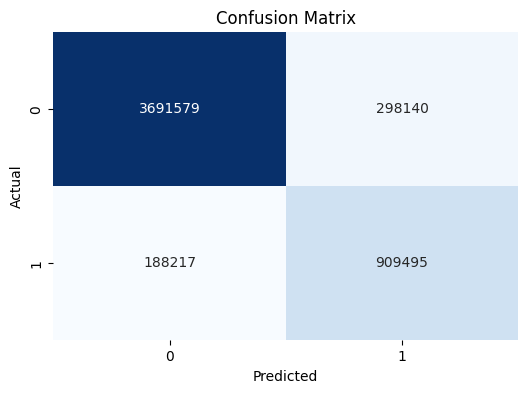


Classification Report:

              precision    recall  f1-score   support

           0       0.95      0.93      0.94   3989719
           1       0.75      0.83      0.79   1097712

    accuracy                           0.90   5087431
   macro avg       0.85      0.88      0.86   5087431
weighted avg       0.91      0.90      0.91   5087431

ROC-AUC: 0.9380505628306328


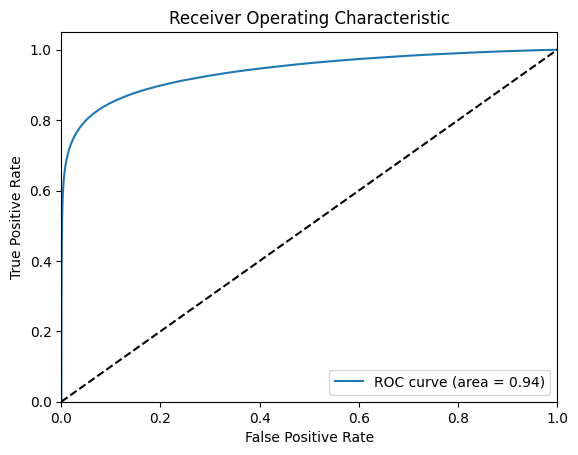

PR AUC: 0.88601111079493


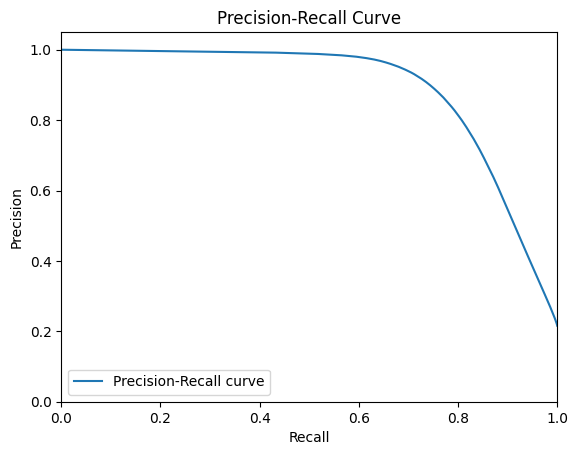

 36%|█████████████████████████████▊                                                    | 4/11 [08:52<23:17, 199.70s/it]


Confusion Matrix:
 [[3583102  406617]
 [ 184175  913537]]


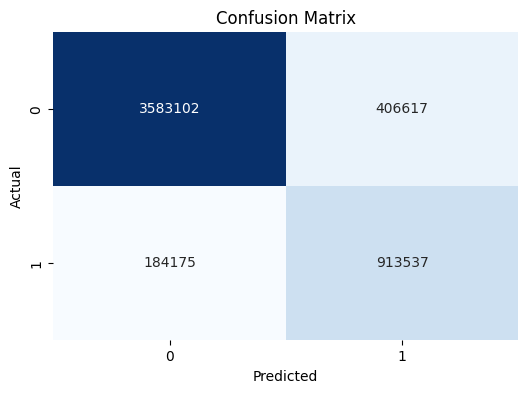


Classification Report:

              precision    recall  f1-score   support

           0       0.95      0.90      0.92   3989719
           1       0.69      0.83      0.76   1097712

    accuracy                           0.88   5087431
   macro avg       0.82      0.87      0.84   5087431
weighted avg       0.90      0.88      0.89   5087431

ROC-AUC: 0.9267183931673632


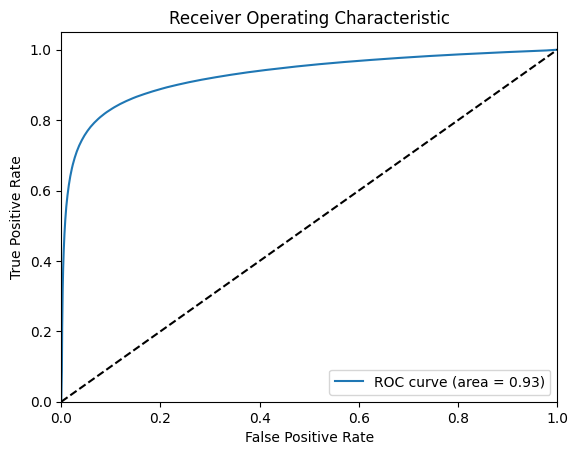

PR AUC: 0.8460994585626632


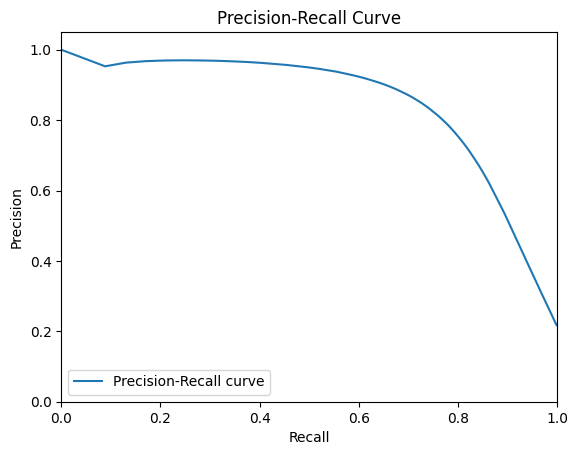

 45%|█████████████████████████████████████▎                                            | 5/11 [20:01<36:53, 368.97s/it]


Confusion Matrix:
 [[3768399  221320]
 [ 214906  882806]]


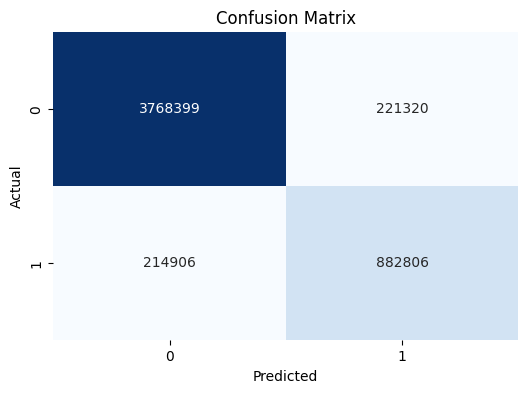


Classification Report:

              precision    recall  f1-score   support

           0       0.95      0.94      0.95   3989719
           1       0.80      0.80      0.80   1097712

    accuracy                           0.91   5087431
   macro avg       0.87      0.87      0.87   5087431
weighted avg       0.91      0.91      0.91   5087431

ROC-AUC: 0.926665511113716


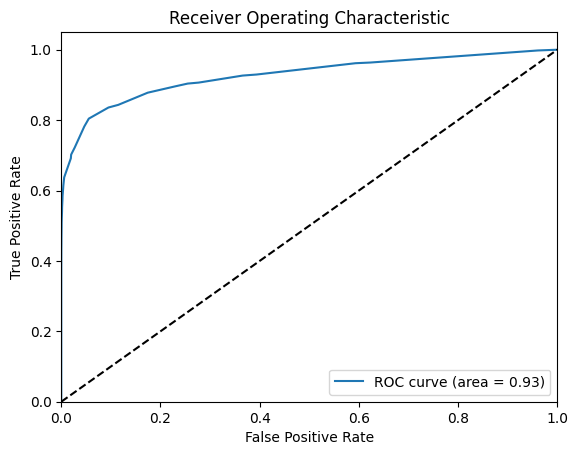

PR AUC: 0.8679679079520926


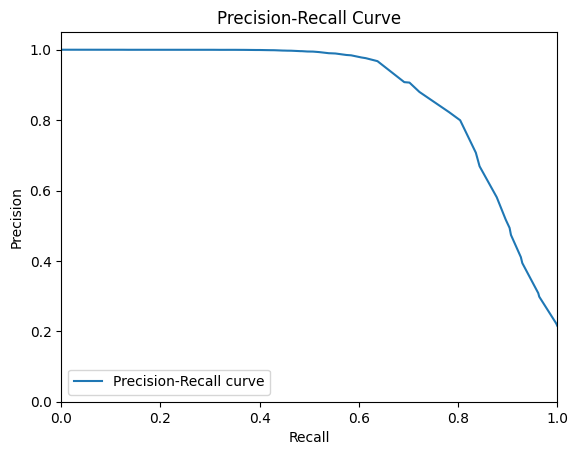

 55%|████████████████████████████████████████████▋                                     | 6/11 [21:32<22:51, 274.34s/it]


Confusion Matrix:
 [[3709612  280107]
 [ 192512  905200]]


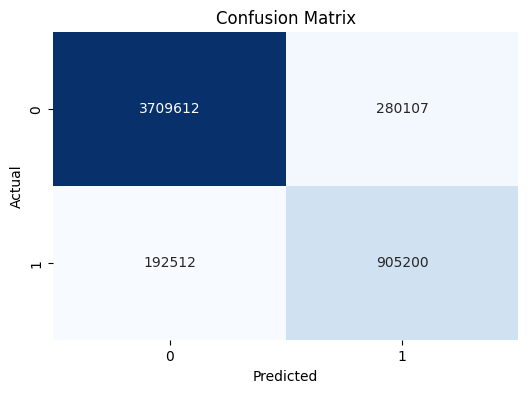


Classification Report:

              precision    recall  f1-score   support

           0       0.95      0.93      0.94   3989719
           1       0.76      0.82      0.79   1097712

    accuracy                           0.91   5087431
   macro avg       0.86      0.88      0.87   5087431
weighted avg       0.91      0.91      0.91   5087431

ROC-AUC: 0.9356653406843947


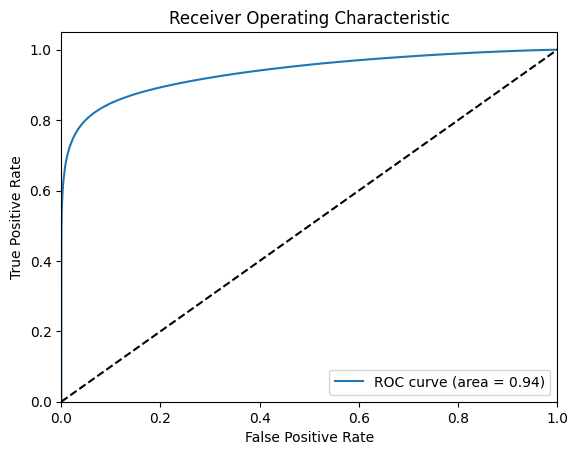

PR AUC: 0.8898530688321633


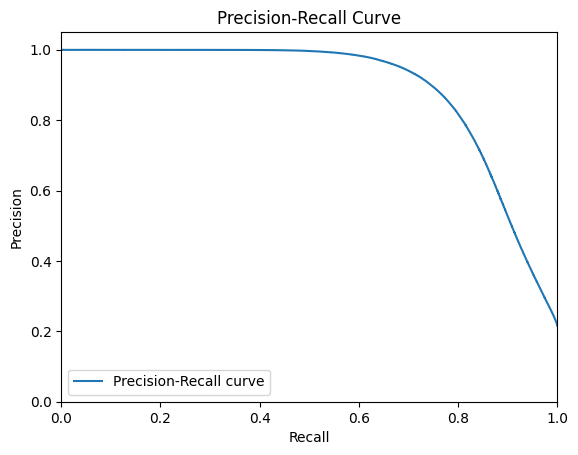

 64%|████████████████████████████████████████████████████▏                             | 7/11 [23:41<15:07, 226.83s/it]


Confusion Matrix:
 [[3713722  275997]
 [ 191813  905899]]


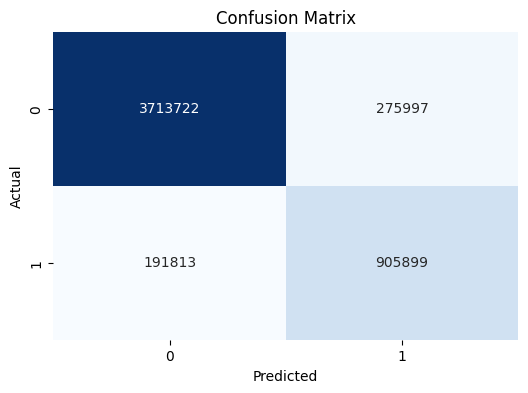


Classification Report:

              precision    recall  f1-score   support

           0       0.95      0.93      0.94   3989719
           1       0.77      0.83      0.79   1097712

    accuracy                           0.91   5087431
   macro avg       0.86      0.88      0.87   5087431
weighted avg       0.91      0.91      0.91   5087431

ROC-AUC: 0.9385894131940035


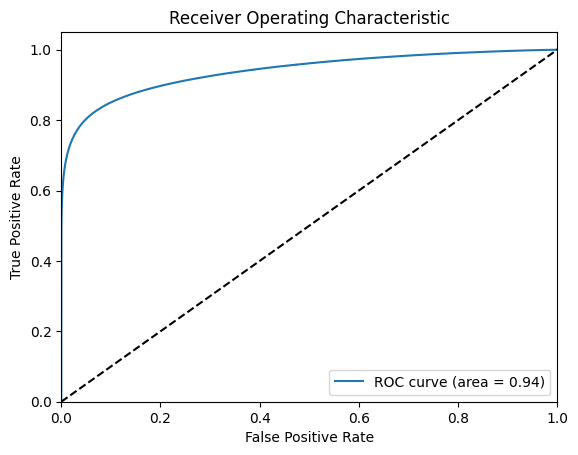

PR AUC: 0.8927756973522828


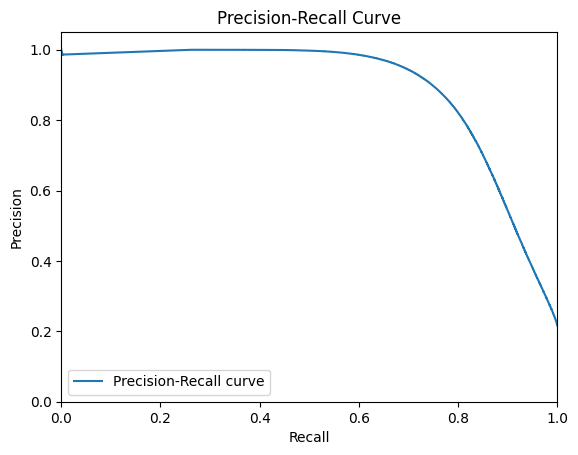

 73%|███████████████████████████████████████████████████████████▋                      | 8/11 [24:40<08:39, 173.23s/it]


Confusion Matrix:
 [[3712395  277324]
 [ 188494  909218]]


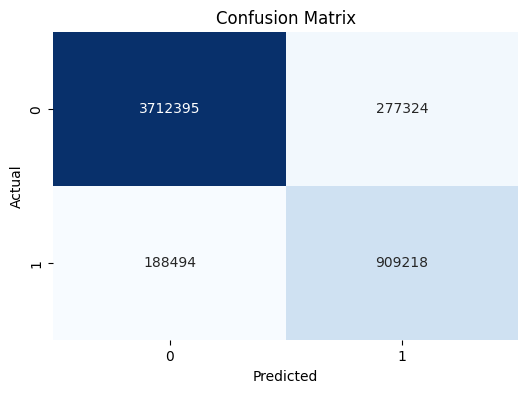


Classification Report:

              precision    recall  f1-score   support

           0       0.95      0.93      0.94   3989719
           1       0.77      0.83      0.80   1097712

    accuracy                           0.91   5087431
   macro avg       0.86      0.88      0.87   5087431
weighted avg       0.91      0.91      0.91   5087431

ROC-AUC: 0.9414928657916717


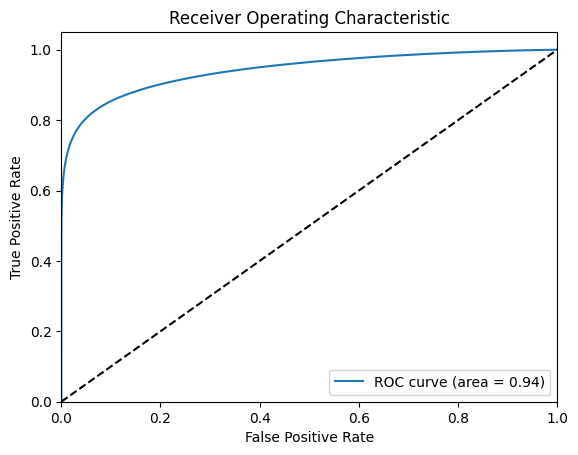

PR AUC: 0.8957351059583926


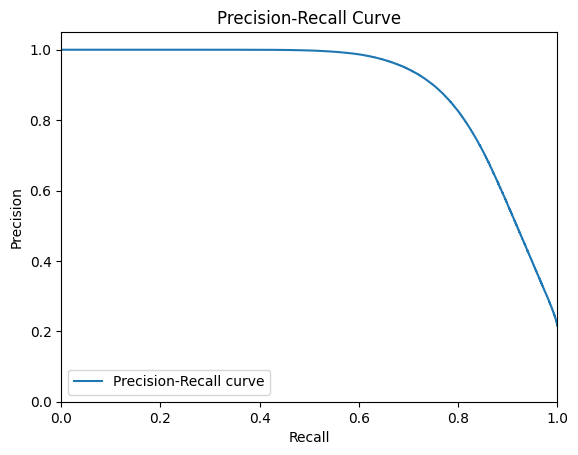

 82%|███████████████████████████████████████████████████████████████████               | 9/11 [25:00<04:11, 125.57s/it]


Confusion Matrix:
 [[3712694  277025]
 [ 186884  910828]]


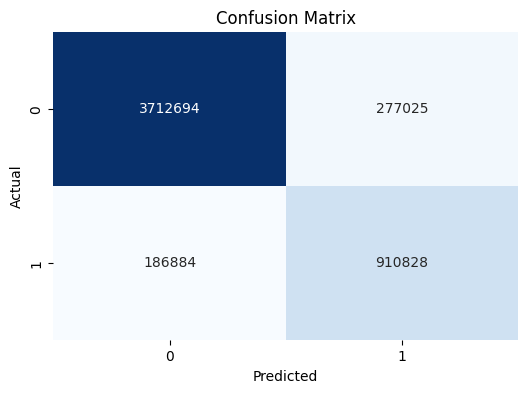


Classification Report:

              precision    recall  f1-score   support

           0       0.95      0.93      0.94   3989719
           1       0.77      0.83      0.80   1097712

    accuracy                           0.91   5087431
   macro avg       0.86      0.88      0.87   5087431
weighted avg       0.91      0.91      0.91   5087431

ROC-AUC: 0.9427522309104619


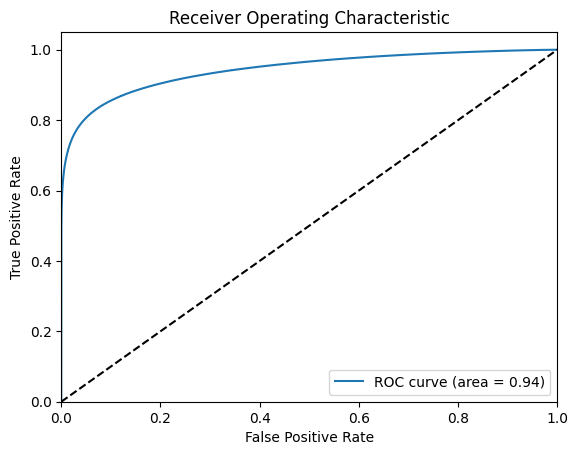

PR AUC: 0.8971451710202993


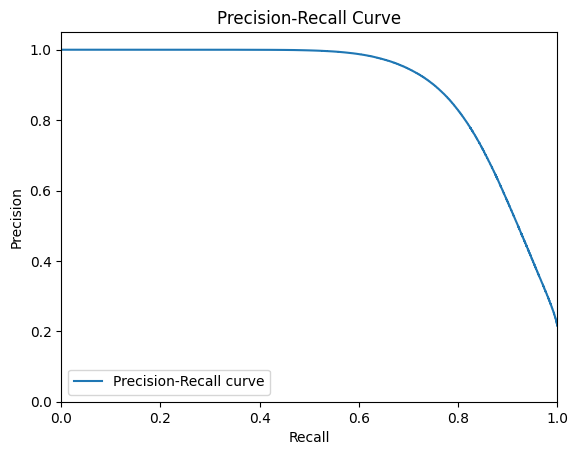

 91%|█████████████████████████████████████████████████████████████████████████▋       | 10/11 [26:25<01:53, 113.08s/it]

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 274428, number of negative: 274428
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006456 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 989
[LightGBM] [Info] Number of data points in the train set: 548856, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000

Confusion Matrix:
 [[3715037  274682]
 [ 191749  905963]]


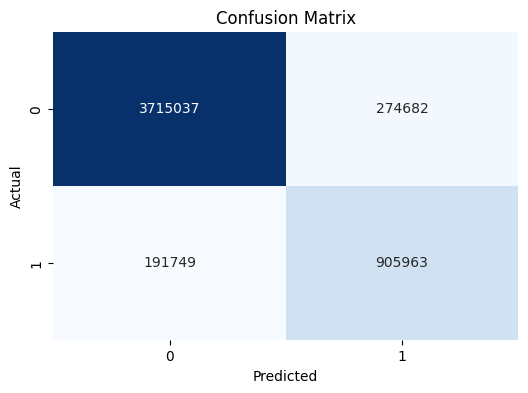


Classification Report:

              precision    recall  f1-score   support

           0       0.95      0.93      0.94   3989719
           1       0.77      0.83      0.80   1097712

    accuracy                           0.91   5087431
   macro avg       0.86      0.88      0.87   5087431
weighted avg       0.91      0.91      0.91   5087431

ROC-AUC: 0.9391125206308347


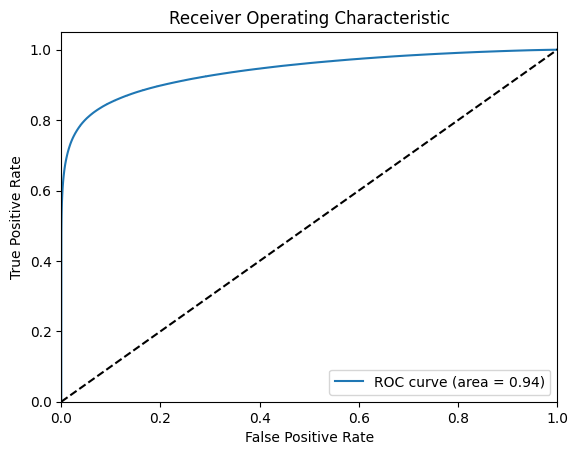

PR AUC: 0.893239933358522


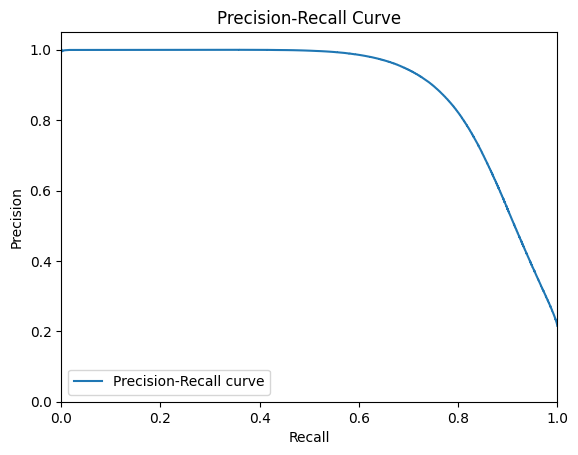

100%|█████████████████████████████████████████████████████████████████████████████████| 11/11 [27:01<00:00, 147.40s/it]


In [156]:


results = {}

for name, model in tqdm(models.items()):
    model.fit(x_train_under, y_train_under)

    train_pred = model.predict(x_train_under)
    test_pred  = model.predict(x_test)

    results[name] = {
        "Train Accuracy": accuracy_score(y_train_under, train_pred),
        "Test Accuracy": accuracy_score(y_test, test_pred),
        "Train Precision": precision_score(y_train_under, train_pred),
        "Test Precision": precision_score(y_test, test_pred),
        "Train Recall": recall_score(y_train_under, train_pred),
        "Test Recall": recall_score(y_test, test_pred),
        "Train F1 Score": f1_score(y_train_under, train_pred),
        "Test F1 Score": f1_score(y_test, test_pred),
        "Train Balanced Accuracy": balanced_accuracy_score(y_train_under, train_pred),
        "Test Balanced Accuracy": balanced_accuracy_score(y_test, test_pred)
    }

    cm = confusion_matrix(y_test, test_pred)
    print("\nConfusion Matrix:\n", cm)

    plt.figure(figsize=(6,4))
    sns.heatmap(cm,annot=True,fmt="d",cmap='Blues',cbar=False,
                xticklabels=['0','1'],
                yticklabels=['0','1'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title('Confusion Matrix')
    plt.show()

    # Full classification report
    print("\nClassification Report:\n")
    print(classification_report(y_test, test_pred, target_names=['0','1'], zero_division=0))

    y_pred_prob = model.predict_proba(x_test)[:, 1]
    roc_auc = roc_auc_score(y_test, y_pred_prob)
    print("ROC-AUC:", roc_auc)

    # ROC curve
    fpr, tpr, roc_thresholds = roc_curve(y_test, y_pred_prob)
    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = {:.2f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], 'k--') 
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

    # Precision-Recall curve
    pr_auc = average_precision_score(y_test, y_pred_prob)
    print("PR AUC:", pr_auc)

    precision_vals, recall_vals, pr_thresholds = precision_recall_curve(y_test, y_pred_prob)
    plt.figure()
    plt.plot(recall_vals, precision_vals, label='Precision-Recall curve')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend(loc="lower left")
    plt.show()


In [157]:
results_df = pd.DataFrame(results).T
results_df = results_df.sort_values(by="Test F1 Score", ascending=False)

In [158]:
results_df

,Train Accuracy,Test Accuracy,Train Precision,Test Precision,Train Recall,Test Recall,Train F1 Score,Test F1 Score,Train Balanced Accuracy,Test Balanced Accuracy
AdaBoost,0.874514,0.914254,0.935921,0.799552,0.804080,0.804224,0.865005,0.801881,0.874514,0.874376
CatBoost,0.885252,0.908813,0.928345,0.766785,0.834951,0.829751,0.879175,0.797027,0.885252,0.880158
XGBoost,0.882931,0.908437,0.926614,0.766275,0.831734,0.828285,0.876614,0.796074,0.882931,0.879387
LightGBM,0.879415,0.908317,0.924710,0.767346,0.826089,0.825319,0.872622,0.795277,0.879415,0.878236
Hist Gradient Boosting,0.879189,0.908046,0.924288,0.766479,0.826042,0.825261,0.872408,0.794785,0.879189,0.878042
Gradient Boosting,0.877760,0.907101,0.922462,0.763684,0.824854,0.824624,0.870932,0.792985,0.877760,0.877209
Random Forest,0.999466,0.904400,0.999737,0.753121,0.999195,0.828537,0.999466,0.789031,0.999466,0.876905
Logistic Regression,0.876736,0.901580,0.913790,0.742893,0.831963,0.831715,0.870959,0.784798,0.876736,0.876259
Extra Trees,0.999492,0.883872,1.000000,0.691993,0.998983,0.832219,0.999491,0.755656,0.999492,0.865151
Naive Bayes,0.839461,0.868373,0.878088,0.664368,0.788378,0.788114,0.830818,0.720970,0.839461,0.839285


In [159]:
model = XGBClassifier(eval_metric='logloss', random_state=1, use_label_encoder=False)
model.fit(x_train_under,y_train_under)

,"objective objective: typing.Union[str, xgboost.sklearn._SklObjWProto, typing.Callable[[typing.Any, typing.Any], typing.Tuple[numpy.ndarray, numpy.ndarray]], NoneType]Specify the learning task and the corresponding learning objective or a customobjective function to be used.For custom objective, see :doc:`/tutorials/custom_metric_obj` and:ref:`custom-obj-metric` for more information, along with the end note forfunction signatures.",'binary:logistic'
,"base_score base_score: typing.Union[float, typing.List[float], NoneType]The initial prediction score of all instances, global bias.",None
,booster,None
,"callbacks callbacks: typing.Optional[typing.List[xgboost.callback.TrainingCallback]]List of callback functions that are applied at end of each iteration.It is possible to use predefined callbacks by using:ref:`Callback API `... note:: States in callback are not preserved during training, which means callback objects can not be reused for multiple training sessions without reinitialization or deepcopy... code-block:: python for params in parameters_grid: # be sure to (re)initialize the callbacks before each run callbacks = [xgb.callback.LearningRateScheduler(custom_rates)] reg = xgboost.XGBRegressor(**params, callbacks=callbacks) reg.fit(X, y)",None
,colsample_bylevel colsample_bylevel: typing.Optional[float]Subsample ratio of columns for each level.,None
,colsample_bynode colsample_bynode: typing.Optional[float]Subsample ratio of columns for each split.,None
,colsample_bytree colsample_bytree: typing.Optional[float]Subsample ratio of columns when constructing each tree.,None
,"device device: typing.Optional[str].. versionadded:: 2.0.0Device ordinal, available options are `cpu`, `cuda`, and `gpu`.",None
,"early_stopping_rounds early_stopping_rounds: typing.Optional[int].. versionadded:: 1.6.0- Activates early stopping. Validation metric needs to improve at least once in every **early_stopping_rounds** round(s) to continue training. Requires at least one item in **eval_set** in :py:meth:`fit`.- If early stopping occurs, the model will have two additional attributes: :py:attr:`best_score` and :py:attr:`best_iteration`. These are used by the :py:meth:`predict` and :py:meth:`apply` methods to determine the optimal number of trees during inference. If users want to access the full model (including trees built after early stopping), they can specify the `iteration_range` in these inference methods. In addition, other utilities like model plotting can also use the entire model.- If you prefer to discard the trees after `best_iteration`, consider using the callback function :py:class:`xgboost.callback.EarlyStopping`.- If there's more than one item in **eval_set**, the last entry will be used for early stopping. If there's more than one metric in **eval_metric**, the last metric will be used for early stopping.",None
,enable_categorical enable_categorical: boolSee the same parameter of :py:class:`DMatrix` for details.,False
,"eval_metric eval_metric: typing.Union[str, typing.List[typing.Union[str, typing.Callable]], typing.Callable, NoneType].. versionadded:: 1.6.0Metric used for monitoring the training result and early stopping. It can be astring or list of strings as names of predefined metric in XGBoost (See:doc:`/parameter`), one of the metrics in :py:mod:`sklearn.metrics`, or anyother user defined metric that looks like `sklearn.metrics`.If custom objective is also provided, then custom metric should implement thecorresponding reverse link function.Unlike the `scoring` parameter commonly used in scikit-learn, when a callableobject is provided, it's assumed to be a cost function and by default XGBoostwill minimize the result during early stopping.For advanced usage on Early stopping like directly choosing to maximize insteadof minimize, see :py:obj:`xgboost.callback.EarlyStopping`.See :doc:`/tutorials/custom_metric_obj` and :ref:`custom-obj-metric` for moreinformation... code-block:: python from sklearn.datasets import load_diabetes 

In [160]:
y_pred = model.predict(x_test)

In [161]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94   3989719
           1       0.77      0.83      0.80   1097712

    accuracy                           0.91   5087431
   macro avg       0.86      0.88      0.87   5087431
weighted avg       0.91      0.91      0.91   5087431



In [162]:
pk.dump(model,open('XGB.pkl','wb'))

------
Pipeline
--

In [163]:
# full_pipeline.py
import pandas as pd
import pickle as pk
import numpy as np
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OneHotEncoder, StandardScaler, RobustScaler

# ========================
# Custom Preprocessing Transformer
# ========================
class FlightPreprocessor(BaseEstimator, TransformerMixin):
    def __init__(self, categorical_cols, numerical_cols, onehot, scaler_std, scaler_robust):
        self.categorical_cols = categorical_cols
        self.numerical_cols = numerical_cols
        self.onehot = onehot
        self.scaler_std = scaler_std
        self.scaler_robust = scaler_robust
        
    def fit(self, X, y=None):
        # Already fitted, nothing to do
        return self
    
    def transform(self, X):
        # Categorical
        X_cat = X[self.categorical_cols]
        X_cat_enc = self.onehot.transform(X_cat)
        
        # Numerical
        X_num = X[self.numerical_cols]
        X_num_std = self.scaler_std.transform(X_num)
        X_num_robust = self.scaler_robust.transform(X_num)
        
        # Combine
        X_final = np.concatenate([X_num_std, X_num_robust, X_cat_enc], axis=1)
        return X_final

# ========================
# Load existing Pickle objects
# ========================
Target = pk.load(open('Target.pkl','rb'))
OneHot = pk.load(open('OneHot.pkl','rb'))
Scaler_Standard = pk.load(open('Stander.pkl','rb'))
Scaler_Robust = pk.load(open('Robus.pkl','rb'))
Model = pk.load(open('XGB.pkl','rb'))

categorical_cols = ['Month_Str', 'DayOfWeek_Str', 'Airlines', 'OriginCityName', 'DestCityName']
numerical_cols = ['DepDelay', 'ArrDelay', 'AirTime', 'Distance']

# ========================
# Create Combined Pipeline object
# ========================
class FullPipeline:
    def __init__(self, model, preprocessor, target_encoder):
        self.model = model
        self.preprocessor = preprocessor
        self.target_encoder = target_encoder
    
    def predict(self, df):
        X = self.preprocessor.transform(df)
        y_pred = self.model.predict(X)
        y_pred_labels = self.target_encoder.inverse_transform(y_pred)
        df['Flight_Status_Pred'] = y_pred_labels
        return df

# ========================
# Instantiate Preprocessor
# ========================
preprocessor = FlightPreprocessor(
    categorical_cols=categorical_cols,
    numerical_cols=numerical_cols,
    onehot=OneHot,
    scaler_std=Scaler_Standard,
    scaler_robust=Scaler_Robust
)

# ========================
# Create Full Pipeline instance
# ========================
pipeline = FullPipeline(model=Model, preprocessor=preprocessor, target_encoder=Target)

# ========================
# Save pipeline as ONE pickle
# ========================
pk.dump(pipeline, open('FlightFullPipeline.pkl','wb'))
print("Full pipeline saved as FlightFullPipeline.pkl")

Full pipeline saved as FlightFullPipeline.pkl
